# IviumSoft control with python

### Import libraries:

In [1]:
from pyvium import Pyvium as iv

# Some extra libraries ---------
from time import sleep
import pandas as pd
# import matplotlib.pyplot as plt

### Open driver and connect device:

In [2]:
iv.open_driver()
iv.connect_device()

### Start an method and show progress

In [3]:
iv.start_method("C:/IviumStat/AppMethods/WennerPulse.imf")

def get_progress():
    total_points = 70
    points = iv.get_available_data_points_number()
    return 100*points/total_points

progress = 0
while progress<100:
    progress = get_progress()
    print('Measurement Progress: ',round(progress,0),'%', end="\r")
    sleep(0.1)   

### Get the result as a pandas dataframe

In [4]:
def get_all_datapoints():
    total_points = iv.get_available_data_points_number()
    data = []
    for point_index in range(1,total_points+1):
        t,V,I = iv.get_data_point(point_index)
        data.append([t,V,I])
    return data

data = get_all_datapoints()

df = pd.DataFrame(data, columns=['Time(s)', 'Potential(V)', 'Current(A)'])
print(df.head())

   Time(s)  Potential(V)  Current(A)
0      0.1 -9.942056e-10    0.000365
1      0.2 -9.959937e-10    0.000367
2      0.3 -9.849669e-10    0.000370
3      0.4 -9.864570e-10    0.000354
4      0.5 -9.942056e-10    0.000371


### Plot the results using matplotlib

<AxesSubplot: >

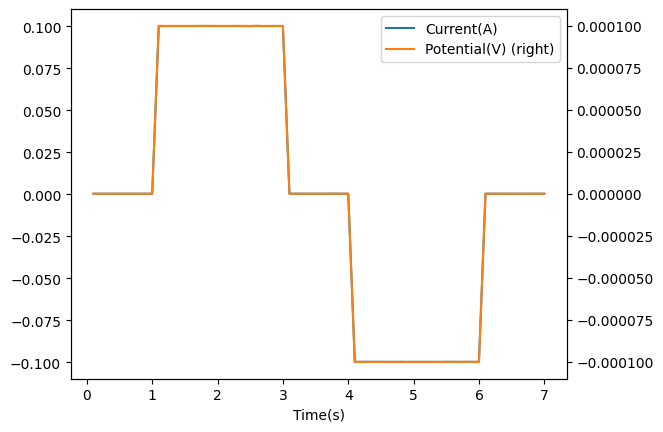

In [5]:
ax = df.plot('Time(s)','Current(A)')
df.plot('Time(s)','Potential(V)',secondary_y=True, ax=ax)

In [ ]:
iv.close_driver()